<a href="https://colab.research.google.com/github/jcdevaney/pyAMPACTtutorials/blob/main/02-pyAMPACT_alignment_Overview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>pyAMPACT Representations of Symbolic Data for Alignment</h1>

In [1]:
!git clone https://github.com/jcdevaney/pyAMPACTtutorials.git
from IPython.utils import io
print('Importing libraries...')
with io.capture_output() as captured:
    !pip install --upgrade pandas
    !pip install -i https://test.pypi.org/simple/ --no-deps pyampact==0.4.7
    import pyampact
    import matplotlib.pyplot as plt
    import matplotlib.image as mpimg

Cloning into 'pyAMPACTtutorials'...
remote: Enumerating objects: 290, done.
remote: Counting objects: 100% (113/113), done.
remote: Compressing objects: 100% (99/99), done.
remote: Total 290 (delta 73), reused 17 (delta 14), pack-reused 177
Receiving objects: 100% (290/290), 17.41 MiB | 16.21 MiB/s, done.
Resolving deltas: 100% (134/134), done.
Importing libraries...


Load a symbolic file, symbolic files can be any format supported by music21 (kern, xml, mei, midi, abc, etc.).


	Detected and imported these spine types:
		 harm function 



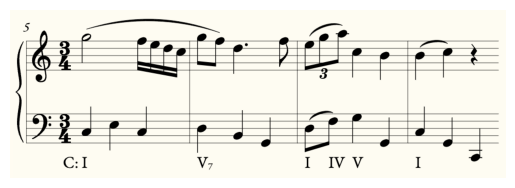

In [2]:
piece = pyampact.Score('/content/pyAMPACTtutorials/test_files/Mozart_K179_seg.krn')

img = mpimg.imread('/content/pyAMPACTtutorials/test_files/Mozart_K179_seg.png')
plt.imshow(img)
plt.axis('off')
plt.show()

Metadata can be accessed/printed by passing different arguements to the `.metadata` method

In [3]:
print(f'-> Successfully imported {piece.metadata["title"]} by {piece.metadata["composer"]}.\n')

-> Successfully imported Zwolf Variationen in C uber ein Menuett von Johann Christian Fischer by Mozart.



The core data representation in the Score object is the nmat (note matrix) table (adapted from the similarly named object in the MIDI Toolbox: https://github.com/miditoolbox/1.1).

An nmat table provides
* an XML_ID for each note (which faciliates linking between importing and exporting of data)
* the measure number that each note occurs in
* note onset and duration in beats
* which musical part each note occurs in
* the MIDI note value for each note
* estimated note onset and offset time in seconds (this is initially estimated from a default BPM but subsequently updated with the aligned audio times)



In [4]:
piece.nmats()

{'Part-1':                  MEASURE     ONSET  DURATION    PART  MIDI  ONSET_SEC  \
 XML_ID                                                                  
 136710476743488        1   0.00000   2.00000  Part-1  79.0    0.00000   
 136710476743584        1   2.00000   0.25000  Part-1  77.0    2.00000   
 136710476743680        1   2.25000   0.25000  Part-1  76.0    2.25000   
 136710476743776        1   2.50000   0.25000  Part-1  74.0    2.50000   
 136710476743872        1   2.75000   0.25000  Part-1  72.0    2.75000   
 136710476744064        2   3.00000   0.50000  Part-1  79.0    3.00000   
 136710476744160        2   3.50000   0.50000  Part-1  77.0    3.50000   
 136710476744256        2   4.00000   1.50000  Part-1  74.0    4.00000   
 136710476744352        2   5.50000   0.50000  Part-1  77.0    5.50000   
 136710476744544        3   6.00000   0.33333  Part-1  76.0    6.00000   
 136710476744736        3   6.33333   0.33333  Part-1  79.0    6.33333   
 136710476745024        3   

Nmat tables are a dictionary of one table per part. The part names are the keys and the tables are the values. Individual parts can be accessed by passing the part name to the nmat dictionary.

In [5]:
nmat_dict = piece.nmats()
nmat_dict['Part-1']

,MEASURE,ONSET,DURATION,PART,MIDI,ONSET_SEC,OFFSET_SEC
XML_ID,,,,,,,
136710476743488,1,0.00000,2.00000,Part-1,79.0,0.00000,2.00000
136710476743584,1,2.00000,0.25000,Part-1,77.0,2.00000,2.25000
136710476743680,1,2.25000,0.25000,Part-1,76.0,2.25000,2.50000
136710476743776,1,2.50000,0.25000,Part-1,74.0,2.50000,2.75000
136710476743872,1,2.75000,0.25000,Part-1,72.0,2.75000,3.00000
136710476744064,2,3.00000,0.50000,Part-1,79.0,3.00000,3.50000
136710476744160,2,3.50000,0.50000,Part-1,77.0,3.50000,4.00000
136710476744256,2,4.00000,1.50000,Part-1,74.0,4.00000,5.50000
136710476744352,2,5.50000,0.50000,Part-1,77.0,5.50000,6.00000


A piano roll of the imported symbolic data can be access with the `.pianoRoll` method.

DISCUSS ARGUMENTS

In [6]:
pianoRoll = piece.pianoRoll()

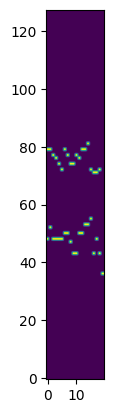

In [7]:
plt.imshow(pianoRoll, origin='lower')

The `.mask()` method generates a spectrogram-like mask of the symbolic data, suitable for running DTW alignment on.

`.mask()` takes the following variables (listed with their default values)
* winms=100,         # together with sample_rate, determines how many pitch (y-axis) bins there are
* sample_rate=2000,  # together with winms, determines how many pitch (y-axis) bins there are
* num_harmonics=1,   # how many harmonics to include, remember that 1 is the pitch itself
* width=0,           # the number of "spectrogram" bins each note covers
* bpm=60,            # beats per minute
* aFreq=440,         # specify tuning by giving the tuning of A4
* base_note=0,       # the lowest pitch in the midi system
* tuning_factor=1,   # 2 cents flat would be .98
* obs=20             # observations per second

In [8]:
# mask with 4 harmonics and a bin width of 1
mask = piece.mask(num_harmonics=4, width=1)

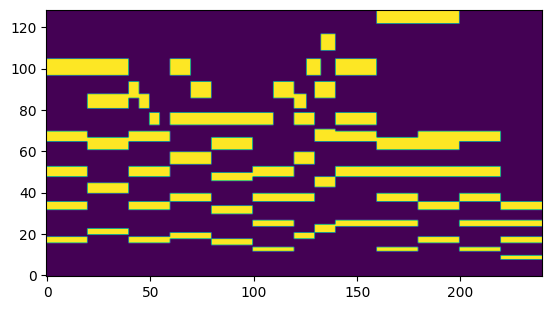

In [9]:
plt.imshow(mask, origin='lower')

Analytic information in the symbolic files can be reshaped to match the time dimesnion of of `.pianoRoll()` or `.mask()` using the `snap_to` parameter.

Since annotations are sparse with respect to the number of time points, functions automatically fill in the intermediary timepoints by repeating the last label. Thsi behavior can be modified with the filler parameter if you want to apply other fill logic.

In [10]:
# get the harmonies in the same shape as the piano roll columns:
piece.harm(snap_to=pianoRoll)

array(['I', 'I', 'I', 'I', 'I', 'I', 'V7', 'V7', 'V7', 'V7', 'V7', 'I',
       'I', 'IV', 'IV', 'V', 'V', 'I', 'I', 'I'], dtype=object)

In [11]:
# get the harmonies in the same shape as the mask columns:
piece.harm(snap_to=mask)

array(['I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I',
       'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I',
       'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I',
       'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I',
       'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'V7', 'V7', 'V7', 'V7',
       'V7', 'V7', 'V7', 'V7', 'V7', 'V7', 'V7', 'V7', 'V7', 'V7', 'V7',
       'V7', 'V7', 'V7', 'V7', 'V7', 'V7', 'V7', 'V7', 'V7', 'V7', 'V7',
       'V7', 'V7', 'V7', 'V7', 'V7', 'V7', 'V7', 'V7', 'V7', 'V7', 'V7',
       'V7', 'V7', 'V7', 'V7', 'V7', 'V7', 'V7', 'V7', 'V7', 'V7', 'V7',
       'V7', 'V7', 'V7', 'V7', 'V7', 'V7', 'V7', 'V7', 'V7', 'V7', 'V7',
       'V7', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'IV', 'IV',
       'IV', 'IV', 'IV', 'IV', 'IV', 'IV', 'IV', 'IV', 'V', 'V', 'V', 'V',
       'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V',
       'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V

To save any of the nmat representations to a csv file, just use panda's to_csv method. *You may want to remove the column labels ("header" argument) and the index.*

In [12]:
# save the pianoroll to the output_files folder
pianoRoll.to_csv('/content/pyAMPACTtutorials/output_files/Mozart_piece_pianoroll.csv', header=False, index=False)


In [13]:
# save the mask to the output_files folder
mask.to_csv('/content/pyAMPACTtutorials/output_files/Mozart_piece_mask.csv', header=False, index=False)